# Classification (using sql database with 24 hours)

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not inside code cells, or use for mathematical formulas if needed. Typically also used to display warning messages.
</div>

<div class="alert alert-block alert-success">
<b>Success:</b> This alert box indicates a successful or positive action.
</div>

<div class="alert alert-block alert-danger">
<b>Danger:</b> This alert box indicates a dangerous or potentially negative action.
</div>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
%run ../flight\ phase\ on\ dataset/db.py
df = db_to_pandas(filename='descriptors_24h.db')
df.head()

,flight_id,flight_start,flight_end,flight_duration,airline,icao,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,...,duration_climb,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,delta_h_climb,max_spd_climb,min_spd_climb,max_vertrate_speed_climb,min_vertrate_speed_climb
0,1,1.597683e+09,1.597689e+09,6410.0,Air Arabia Maroc,0200f9,3170.0,162.752079,65.302395,-6.000625,...,710.0,236.873236,17.576272,8.693426,2.491583,5600.70,255.409919,215.001282,12.67968,3.57632
1,2,1.597644e+09,1.597654e+09,9350.0,Air Arabia Maroc,020108,2690.0,180.157112,65.826218,-5.694844,...,1370.0,211.879969,44.535401,7.598672,2.963807,10233.66,255.158519,79.909565,14.95552,2.27584
2,3,1.597657e+09,1.597668e+09,10370.0,Air Arabia Maroc,020108,1430.0,162.234516,56.032063,-7.989037,...,1190.0,173.766692,47.096655,9.958426,5.567489,10911.84,232.513322,55.227906,23.73376,-0.32512
3,4,1.597675e+09,1.597684e+09,9520.0,Air Arabia Maroc,020108,2860.0,176.455751,66.242427,-6.110245,...,4490.0,217.198070,46.342640,6.570305,2.971641,10927.08,256.325821,77.968397,15.28064,-0.32512
4,5,1.597688e+09,1.597698e+09,10190.0,Air Arabia Maroc,020108,2690.0,157.699108,61.944099,-8.355068,...,950.0,169.643762,44.787904,9.661801,3.812572,10888.98,213.196543,70.170237,19.18208,0.32512


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flight_id                   1560 non-null   int64  
 1   flight_start                1560 non-null   float64
 2   flight_end                  1560 non-null   float64
 3   flight_duration             1560 non-null   float64
 4   airline                     1518 non-null   object 
 5   icao                        1560 non-null   object 
 6   duration_descent            1560 non-null   float64
 7   avg_speed_descent           1560 non-null   float64
 8   std_speed_descent           1560 non-null   float64
 9   avg_vertrate_speed_descent  1560 non-null   float64
 10  std_vertrate_speed_descent  1560 non-null   float64
 11  delta_h_descent             1560 non-null   float64
 12  max_spd_descent             1560 non-null   float64
 13  min_spd_descent             1560 

<div class="alert alert-block alert-danger">
<b>Problem:</b> the data type of "flight_start" and "flight_end".
</div>


<AxesSubplot:>

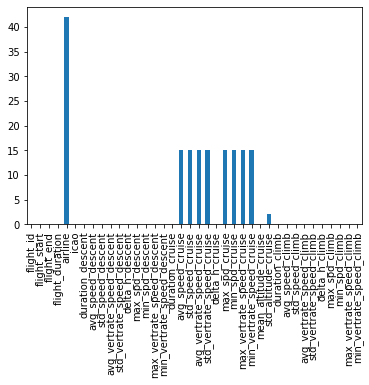

In [3]:
# The number of null values
df.isna().sum().plot(kind='bar')

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1559
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   flight_id                   1503 non-null   int64  
 1   flight_start                1503 non-null   float64
 2   flight_end                  1503 non-null   float64
 3   flight_duration             1503 non-null   float64
 4   airline                     1503 non-null   object 
 5   icao                        1503 non-null   object 
 6   duration_descent            1503 non-null   float64
 7   avg_speed_descent           1503 non-null   float64
 8   std_speed_descent           1503 non-null   float64
 9   avg_vertrate_speed_descent  1503 non-null   float64
 10  std_vertrate_speed_descent  1503 non-null   float64
 11  delta_h_descent             1503 non-null   float64
 12  max_spd_descent             1503 non-null   float64
 13  min_spd_descent             1503 

In [5]:
df.drop(columns=['flight_start','flight_end','icao'],inplace=True)

In [6]:
df.head()

,flight_id,flight_duration,airline,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,delta_h_descent,max_spd_descent,...,duration_climb,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,delta_h_climb,max_spd_climb,min_spd_climb,max_vertrate_speed_climb,min_vertrate_speed_climb
0,1,6410.0,Air Arabia Maroc,3170.0,162.752079,65.302395,-6.000625,3.182320,723.90,260.851518,...,710.0,236.873236,17.576272,8.693426,2.491583,5600.70,255.409919,215.001282,12.67968,3.57632
1,2,9350.0,Air Arabia Maroc,2690.0,180.157112,65.826218,-5.694844,2.652992,-10683.24,260.546968,...,1370.0,211.879969,44.535401,7.598672,2.963807,10233.66,255.158519,79.909565,14.95552,2.27584
2,3,10370.0,Air Arabia Maroc,1430.0,162.234516,56.032063,-7.989037,5.072809,-11087.10,226.124327,...,1190.0,173.766692,47.096655,9.958426,5.567489,10911.84,232.513322,55.227906,23.73376,-0.32512
3,4,9520.0,Air Arabia Maroc,2860.0,176.455751,66.242427,-6.110245,3.371099,-11391.90,264.022063,...,4490.0,217.198070,46.342640,6.570305,2.971641,10927.08,256.325821,77.968397,15.28064,-0.32512
4,5,10190.0,Air Arabia Maroc,2690.0,157.699108,61.944099,-8.355068,5.436297,-11003.28,241.673724,...,950.0,169.643762,44.787904,9.661801,3.812572,10888.98,213.196543,70.170237,19.18208,0.32512


In [7]:
df['airline'].value_counts()

Eurowings                        161
American Airlines                150
Air France                       144
Wizz Air                         119
easyJet UK                        89
Lufthansa                         79
Alitalia                          74
British Airways                   53
Vueling Airlines                  53
United Airlines                   52
Delta Air Lines                   47
Spirit Airlines                   45
easyJet Europe                    36
Allegiant Air                     33
easyJet Switzerland               32
Aer Lingus                        27
Brussels Airlines                 25
Swiss International Air Lines     25
Ryanair                           23
Austrian Airlines                 23
Turkish Airlines                  21
Air Serbia                        18
Air Malta                         14
TAP Portugal                      14
Finnair                           13
Alaska Airlines, Inc.             13
Croatia Airlines                  11
S

In [99]:
df["airline"] = df["airline"].astype('category')
df["airline_cat"]=df["airline"].cat.codes
df_noairline = df.drop(columns=['airline'])
df_noairline.set_index('flight_id',inplace=True)
df_noairline.head()

,flight_duration,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,delta_h_descent,max_spd_descent,min_spd_descent,max_vertrate_speed_descent,...,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,delta_h_climb,max_spd_climb,min_spd_climb,max_vertrate_speed_climb,min_vertrate_speed_climb,airline_cat
flight_id,,,,,,,,,,,,,,,,,,,,,
1,6410.0,3170.0,162.752079,65.302395,-6.000625,3.182320,723.90,260.851518,67.664544,0.32512,...,236.873236,17.576272,8.693426,2.491583,5600.70,255.409919,215.001282,12.67968,3.57632,2
2,9350.0,2690.0,180.157112,65.826218,-5.694844,2.652992,-10683.24,260.546968,70.890682,0.32512,...,211.879969,44.535401,7.598672,2.963807,10233.66,255.158519,79.909565,14.95552,2.27584,2
3,10370.0,1430.0,162.234516,56.032063,-7.989037,5.072809,-11087.10,226.124327,62.538281,0.65024,...,173.766692,47.096655,9.958426,5.567489,10911.84,232.513322,55.227906,23.73376,-0.32512,2
4,9520.0,2860.0,176.455751,66.242427,-6.110245,3.371099,-11391.90,264.022063,70.630744,0.32512,...,217.198070,46.342640,6.570305,2.971641,10927.08,256.325821,77.968397,15.28064,-0.32512,2
5,10190.0,2690.0,157.699108,61.944099,-8.355068,5.436297,-11003.28,241.673724,57.112553,1.30048,...,169.643762,44.787904,9.661801,3.812572,10888.98,213.196543,70.170237,19.18208,0.32512,2


In [100]:
df_noairline.describe()

,flight_duration,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,delta_h_descent,max_spd_descent,min_spd_descent,max_vertrate_speed_descent,...,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,delta_h_climb,max_spd_climb,min_spd_climb,max_vertrate_speed_climb,min_vertrate_speed_climb,airline_cat
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,...,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,6066.733200,2177.937458,165.757696,55.661682,-6.960707,3.886136,-9621.550419,237.082878,67.181270,0.243786,...,191.704994,43.536217,9.403641,4.228290,10600.814212,234.505092,75.898103,20.572330,0.616062,29.865602
std,2855.815225,1726.331942,14.031152,8.618562,1.121793,1.022967,3421.443725,19.578685,12.256837,0.828936,...,12.220314,6.422537,1.452275,0.701407,1317.789816,16.348559,12.255858,3.577249,1.793738,17.461177
min,2080.000000,870.000000,90.997767,7.593684,-11.877132,1.300288,-20794.980000,173.909466,12.009816,-4.551680,...,149.588608,1.116747,3.982720,1.461137,-601.980000,188.885735,0.000000,6.827520,-44.866560,0.000000
25%,4010.000000,1540.000000,156.391947,50.393308,-7.600098,3.184478,-11414.760000,226.886989,62.396351,0.000000,...,183.337361,39.360493,8.428887,3.771814,10256.520000,224.188414,72.821539,18.531840,0.000000,16.000000
50%,5520.000000,1790.000000,165.469126,55.678814,-6.815251,3.785717,-10873.740000,236.288335,66.049481,0.325120,...,190.715150,43.342096,9.311000,4.143643,10934.700000,233.520179,77.166600,20.157440,0.000000,29.000000
75%,7490.000000,2210.000000,174.612325,60.715311,-6.189960,4.494217,-9837.420000,246.286270,69.976676,0.325120,...,199.344474,47.614143,10.310972,4.624644,11361.420000,244.566591,80.728378,22.108160,0.975360,48.000000
max,28670.000000,22850.000000,229.323087,87.564446,-4.140130,8.375520,14577.060000,718.527086,221.157076,7.477760,...,238.074887,69.087429,15.022022,10.413252,12275.820000,531.917433,217.785479,92.008960,7.152640,56.000000


In [101]:
columns = df_noairline.columns
columns

Index(['flight_duration', 'duration_descent', 'avg_speed_descent',
       'std_speed_descent', 'avg_vertrate_speed_descent',
       'std_vertrate_speed_descent', 'delta_h_descent', 'max_spd_descent',
       'min_spd_descent', 'max_vertrate_speed_descent',
       'min_vertrate_speed_descent', 'duration_cruise', 'avg_speed_cruise',
       'std_speed_cruise', 'avg_vertrate_speed_cruise',
       'std_vertrate_speed_cruise', 'delta_h_cruise', 'max_spd_cruise',
       'min_spd_cruise', 'max_vertrate_speed_cruise',
       'min_vertrate_speed_cruise', 'mean_altitude_cruise',
       'std_altitude_cruise', 'duration_climb', 'avg_speed_climb',
       'std_speed_climb', 'avg_vertrate_speed_climb',
       'std_vertrate_speed_climb', 'delta_h_climb', 'max_spd_climb',
       'min_spd_climb', 'max_vertrate_speed_climb', 'min_vertrate_speed_climb',
       'airline_cat'],
      dtype='object')

In [35]:
# for column in columns:
#     plt.figure()
#     df_noairline[column].hist(legend=True, bins=20)  

# Correlation between features

<AxesSubplot:>

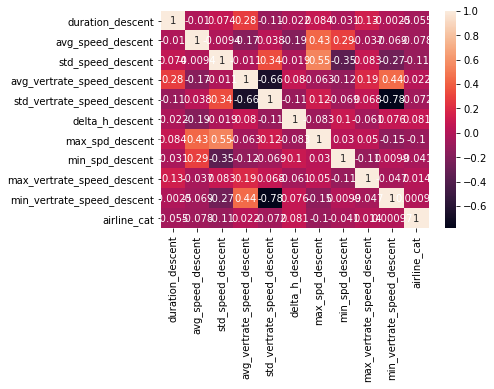

In [102]:
descent = ['duration_descent','avg_speed_descent','std_speed_descent','avg_vertrate_speed_descent','std_vertrate_speed_descent','delta_h_descent', 'max_spd_descent',
       'min_spd_descent', 'max_vertrate_speed_descent',
       'min_vertrate_speed_descent','airline_cat']
sns.heatmap(df_noairline[descent].corr(),annot = True)

<AxesSubplot:>

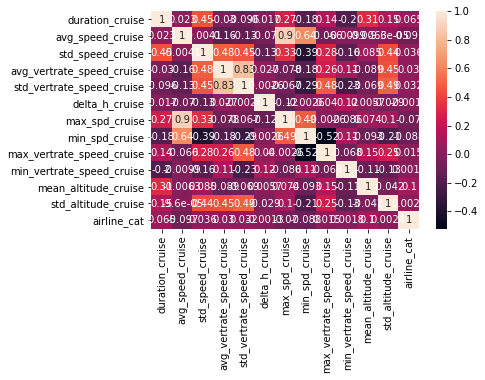

In [103]:
cruise = ['duration_cruise', 'avg_speed_cruise',
       'std_speed_cruise', 'avg_vertrate_speed_cruise',
       'std_vertrate_speed_cruise', 'delta_h_cruise', 'max_spd_cruise',
       'min_spd_cruise', 'max_vertrate_speed_cruise',
       'min_vertrate_speed_cruise', 'mean_altitude_cruise',
       'std_altitude_cruise','airline_cat']
sns.heatmap(df_noairline[cruise].corr(),annot = True)

<AxesSubplot:>

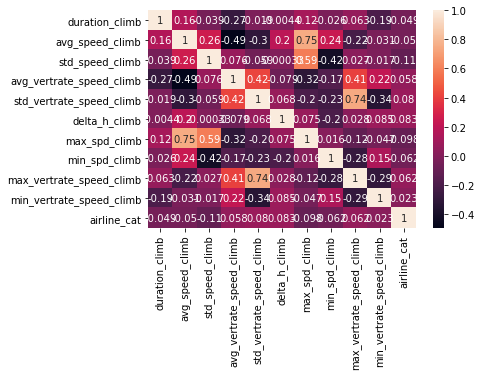

In [104]:
climb = ['duration_climb', 'avg_speed_climb',
       'std_speed_climb', 'avg_vertrate_speed_climb',
       'std_vertrate_speed_climb', 'delta_h_climb', 'max_spd_climb',
       'min_spd_climb', 'max_vertrate_speed_climb', 'min_vertrate_speed_climb',
       'airline_cat']
sns.heatmap(df_noairline[climb].corr(),annot = True)

In [105]:
corr_matrix = df_noairline.corr(method='spearman')

In [106]:
corr_matrix[(corr_matrix>0.5) | (corr_matrix<-0.5)]

,flight_duration,duration_descent,avg_speed_descent,std_speed_descent,avg_vertrate_speed_descent,std_vertrate_speed_descent,delta_h_descent,max_spd_descent,min_spd_descent,max_vertrate_speed_descent,...,avg_speed_climb,std_speed_climb,avg_vertrate_speed_climb,std_vertrate_speed_climb,delta_h_climb,max_spd_climb,min_spd_climb,max_vertrate_speed_climb,min_vertrate_speed_climb,airline_cat
flight_duration,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration_descent,NaN,1.000000,NaN,NaN,0.693357,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_speed_descent,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.510886,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_speed_descent,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.651293,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_vertrate_speed_descent,NaN,0.693357,NaN,NaN,1.000000,-0.648926,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_vertrate_speed_descent,NaN,NaN,NaN,NaN,-0.648926,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delta_h_descent,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.678364,NaN,NaN,NaN,NaN,NaN
max_spd_descent,NaN,NaN,0.510886,0.651293,NaN,NaN,NaN,1.000000,NaN,NaN,...,0.552519,NaN,NaN,NaN,NaN,0.588128,NaN,NaN,NaN,NaN
min_spd_descent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_vertrate_speed_descent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
(corr_matrix[(corr_matrix>0.5) | (corr_matrix<-0.5)].count().sum() - corr_matrix.columns.shape[0])/2

37.0

There exists several couples (37) of variables that are highly correlated, with a coefficient of correlation superior to 0.5. A feature selection process needs to be conducted.

In [98]:
# from sklearn.datasets import load_boston
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import ShuffleSplit
# import numpy as np

# #加载波士顿房价作为数据集
# boston = load_boston()
# X = boston["data"]
# Y = boston["target"]
# names = boston["feature_names"]

# #n_estimators为森林中树木数量，max_depth树的最大深度
# rf = RandomForestRegressor(n_estimators=20, max_depth=4)
# scores = []
# for i in range(X.shape[1]):
#     #每次选择一个特征，进行交叉验证，训练集和测试集为7:3的比例进行分配，
#     #ShuffleSplit()函数用于随机抽样（数据集总数，迭代次数，test所占比例）
#     score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2",
#                                cv=ShuffleSplit(len(X), 3, .3))
#     scores.append((round(np.mean(score), 3), names[i]))

# #打印出各个特征所对应的得分
# print(sorted(scores, reverse=True))

In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
X = df_noairline.iloc[:,:-1]
y = df_noairline.loc[:,["airline_cat"]]
columns = df_noairline.columns

rf = RandomForestClassifier(n_estimators = 20, max_depth = 4)